In [1]:
#Imports
import praw
import json

In [2]:
#Get Credentials
with open('config.json', 'r') as file:
    data = json.load(file)
    client_id = data['reddit_clientID']
    client_secret = data['reddit_secret']

In [3]:
#Get Data using PRAW 'Python Reddit api w???'
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent='MyApp/1.0 by grayhound_56')

subreddit = reddit.subreddit('Python')

for submission in subreddit.hot(limit=10):
    print(submission.title)

Sunday Daily Thread: What's everyone working on this week?
Wednesday Daily Thread: Beginner questions
I wrote a program that organizes your music library by renaming your music files based on the ID3 tag (metadata).
Alternatives to Makefile for Python
[WIP] drag’n drop UI builder for python
PEP 704 – Require virtual environments by default for package installers
A GUI to automatically generate AI images from dream.ai
Made a generator tool of these 3D-Print-ready models
I wrote an app for people suffering from OCD
Asynchronous programming in Python with asyncio


In [37]:
#Get Data
# subreddits = ['Daytrading', 'stocks', 'Stock_Picks', 'wallstreetbets']
dayTrading = reddit.subreddit('Daytrading')
data_filtered = dayTrading.search("title:microsoft OR title:msft", sort='relevance', limit=None, time_filter='all')

In [38]:
#Find what data can be had from posts at this url
# "https://praw.readthedocs.io/en/stable/code_overview/models/submission.html#praw.models.Submission"

data_filtered = list(data_filtered)
print("Data found: " + str(len(data_filtered)))

from datetime import datetime as dt
#Show most recent and oldest post timestamps
print(dt.utcfromtimestamp(int(data_filtered[0].created_utc)))
print(dt.utcfromtimestamp(int(data_filtered[-1].created_utc)))

#Get n top comments
n = 3
top_n_comments = data_filtered[0].comments[:n]

for comment in top_n_comments:
    print(comment.body)

Data found: 25
1674596564.0
2023-01-24 21:42:44
2020-06-25 13:02:38
Microsoft plumetted to become negative AH on poor guidance. Do you consider this to be of concern?
4015 and dropping
>However now that we have a nice push here we have broken that double top  and presumably will see continuation tomorrow. Futures also closed a  full candle over the daily 200ema for the first time since December 1st.

This is backwards. Each week should be considered as a giant OHLC candle (because that's what it is). The first half of the week is accumulation, the middle is manipulation (markup/markdown), and the end is distribution.

The fact that futures opened Sunday night, immediately peeled off and created a high Monday, then created another high today right before close (as I predicted) is sounding a giant alarm bell that a dump on Thursday & Friday is likely...

My guess for tomorrow is sideways to slightly down. If we create a new high tomorrow (unlikely), the dump on Thurs & Friday will be tha

In [6]:
#Import SA for below analyis
import SentimentAnalysis as SA

c:\Users\eggte\Documents\Python Projects 2023\Sentimental Data Gatherer\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
#Do analyis on the sentiment of the data
titles = [item.title for item in data_filtered]
titleSentiment = SA.GetSentiment(titles)
titleSentiment = SA.GetSummationSentiment(titleSentiment)
print(titleSentiment)


{'Very Good': 0.31821178704500197, 'Good': 0.40119359746575356, 'Nuetral': 0.08624047050252556, 'Bad': 0.13236297172494232, 'Very Bad': 0.061991174761205914}


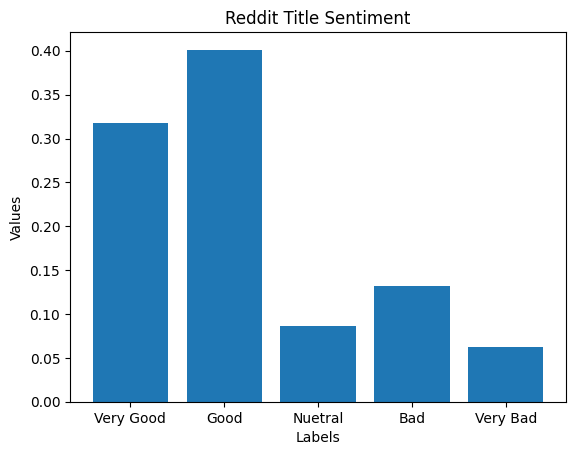

In [12]:
import matplotlib.pyplot as plt

# Extract the keys and values from the dictionary
x = list(titleSentiment.keys())
y = list(titleSentiment.values())

# Create the chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Reddit Title Sentiment')
plt.show()

In [27]:
#Scrape comments next
numberOfComments = 3
data_list = []

for post in data_filtered:
    comments = post.comments[:numberOfComments]
    comments = [item.body for item in comments]
    data_list.append({"Title": post.title, "Comments" : comments})

In [33]:
#Perform Sentiment Analyis (SA) on the comments
comments = [item['Comments'] for item in data_list]
comments_flat = []
for sublist in comments:
    for comment in sublist:
        comments_flat.append(comment)
print("Performing Sentimental Analysis on " + str(len(comments_flat)) + " Comments")
commentSentiment = SA.GetSentiment(comments_flat)
commentSentiment = SA.GetSummationSentiment(commentSentiment)
print(commentSentiment)

Performing Sentimental Analysis on 54 Comments
{'Very Good': 0.22119059272248437, 'Good': 0.33052061545162426, 'Nuetral': 0.0944509236616324, 'Bad': 0.25183094558909674, 'Very Bad': 0.10200692607408941}


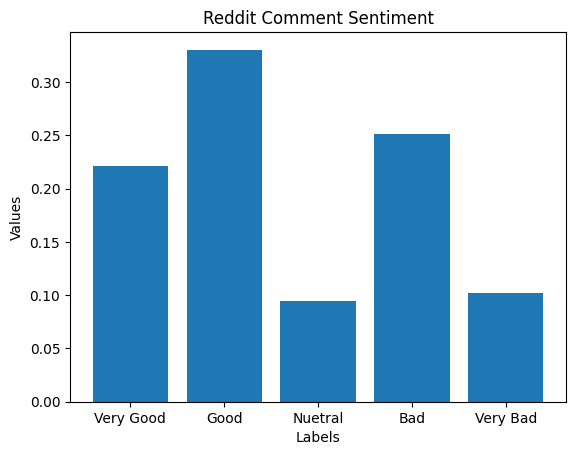

In [32]:
#Plot the comment sentiment data
# Extract the keys and values from the dictionary
comment_x = list(commentSentiment.keys())
comment_y = list(commentSentiment.values())

# Create the chart
plt.bar(comment_x, comment_y)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Reddit Comment Sentiment')
plt.show()